fetches the data and concats  them together.

In [1]:
import pandas as pd
from ucimlrepo import fetch_ucirepo 

chronic_kidney_disease = fetch_ucirepo(id=336) 
  
 
X = chronic_kidney_disease.data.features 
y = chronic_kidney_disease.data.targets 

  

df = pd.concat([X, y], axis=1)
pd.set_option('display.max_columns', None)
#pc, pcc , ba, sc, htn,rbc , dm , cad, appet , pe ,ane
df = df.drop(['pc', 'pcc' , 'ba', 'sc', 'htn','rbc' , 'dm' , 'cad', 'appet' , 'pe' ,'ane'],axis=1)
df

,age,bp,sg,al,su,bgr,bu,sod,pot,hemo,pcv,wbcc,rbcc,class
0,48.0,80.0,1.020,1.0,0.0,121.0,36.0,NaN,NaN,15.4,44.0,7800.0,5.2,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,18.0,NaN,NaN,11.3,38.0,6000.0,NaN,ckd
2,62.0,80.0,1.010,2.0,3.0,423.0,53.0,NaN,NaN,9.6,31.0,7500.0,NaN,ckd
3,48.0,70.0,1.005,4.0,0.0,117.0,56.0,111.0,2.5,11.2,32.0,6700.0,3.9,ckd
4,51.0,80.0,1.010,2.0,0.0,106.0,26.0,NaN,NaN,11.6,35.0,7300.0,4.6,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,140.0,49.0,150.0,4.9,15.7,47.0,6700.0,4.9,notckd
396,42.0,70.0,1.025,0.0,0.0,75.0,31.0,141.0,3.5,16.5,54.0,7800.0,6.2,notckd
397,12.0,80.0,1.020,0.0,0.0,100.0,26.0,137.0,4.4,15.8,49.0,6600.0,5.4,notckd
398,17.0,60.0,1.025,0.0,0.0,114.0,50.0,135.0,4.9,14.2,51.0,7200.0,5.9,notckd


converts hemoglobin units to g/l

In [2]:
df["hemo"] = df["hemo"]/10

replaces ckd and ckd/t as "a" and notckd as "c"  
a = affected, c = controlled

In [3]:
df['class'] = df['class'].replace({'ckd': 'a','ckd\t': "a", 'notckd': 'c'})

check if columns class only has two unique values.

In [4]:
df["class"].unique()

array(['a', 'c'], dtype=object)

filters blood pressure to only show values under 130 and potassium values under 30.

In [5]:
df['bp'] = df['bp'].apply(lambda x: x if x < 130 else None)
df['pot'] = df['pot'].apply(lambda x: x if x < 30 else None)

calculates the basic statistics.

In [6]:
df.describe(include='all')

,age,bp,sg,al,su,bgr,bu,sod,pot,hemo,pcv,wbcc,rbcc,class
count,391.000000,386.000000,353.000000,354.000000,351.000000,356.000000,381.000000,313.000000,310.000000,348.000000,329.000000,294.000000,269.000000,400
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,a
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,250
mean,51.483376,76.036269,1.017408,1.016949,0.450142,148.036517,57.425722,137.528754,4.379677,1.252644,38.884498,8406.122449,4.707435,NaN
std,17.169714,12.235300,0.005717,1.352679,1.099191,79.281714,50.503006,10.408752,0.755952,0.291259,8.990105,2944.474190,1.025323,NaN
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,4.500000,2.500000,0.310000,9.000000,2200.000000,2.100000,NaN
25%,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,135.000000,3.800000,1.030000,32.000000,6500.000000,3.900000,NaN
50%,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,138.000000,4.400000,1.265000,40.000000,8000.000000,4.800000,NaN
75%,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,142.000000,4.900000,1.500000,45.000000,9800.000000,5.400000,NaN


drops every row that has 3 or more empty values(doesnt apply to empty strings)

In [7]:
threshold = len(df.columns)-3
print(len(df))
df.dropna(thresh=threshold,inplace=True)
print(len(df))

400
297


splits the dataframe into two dataframes one for the affected inviduals and one for the controlled inviduals.

In [8]:
df1 = df[df["class"]=="a"]
df2 = df[df["class"]=="c"]
print(len(df1))
print(len(df2))

153
144


displays the dataframe for affected inviduals

In [9]:
df1

,age,bp,sg,al,su,bgr,bu,sod,pot,hemo,pcv,wbcc,rbcc,class
0,48.0,80.0,1.020,1.0,0.0,121.0,36.0,NaN,NaN,1.54,44.0,7800.0,5.2,a
2,62.0,80.0,1.010,2.0,3.0,423.0,53.0,NaN,NaN,0.96,31.0,7500.0,NaN,a
3,48.0,70.0,1.005,4.0,0.0,117.0,56.0,111.0,2.5,1.12,32.0,6700.0,3.9,a
4,51.0,80.0,1.010,2.0,0.0,106.0,26.0,NaN,NaN,1.16,35.0,7300.0,4.6,a
5,60.0,90.0,1.015,3.0,0.0,74.0,25.0,142.0,3.2,1.22,39.0,7800.0,4.4,a
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,64.0,90.0,1.015,3.0,2.0,463.0,64.0,135.0,4.1,1.22,40.0,9800.0,4.6,a
245,48.0,100.0,NaN,NaN,NaN,103.0,79.0,135.0,6.3,0.63,19.0,7200.0,2.6,a
246,48.0,110.0,1.015,3.0,0.0,106.0,215.0,120.0,5.7,0.86,26.0,5000.0,2.5,a
248,59.0,70.0,1.010,1.0,3.0,424.0,55.0,138.0,4.5,1.26,37.0,10200.0,4.1,a


displays the dataframe for control inviduals

In [10]:
df2

,age,bp,sg,al,su,bgr,bu,sod,pot,hemo,pcv,wbcc,rbcc,class
250,40.0,80.0,1.025,0.0,0.0,140.0,10.0,135.0,5.0,1.50,48.0,10400.0,4.5,c
251,23.0,80.0,1.025,0.0,0.0,70.0,36.0,150.0,4.6,1.70,52.0,9800.0,5.0,c
252,45.0,80.0,1.025,0.0,0.0,82.0,49.0,147.0,4.4,1.59,46.0,9100.0,4.7,c
253,57.0,80.0,1.025,0.0,0.0,119.0,17.0,135.0,4.7,1.54,42.0,6200.0,6.2,c
254,51.0,60.0,1.025,0.0,0.0,99.0,38.0,135.0,3.7,1.30,49.0,8300.0,5.2,c
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,140.0,49.0,150.0,4.9,1.57,47.0,6700.0,4.9,c
396,42.0,70.0,1.025,0.0,0.0,75.0,31.0,141.0,3.5,1.65,54.0,7800.0,6.2,c
397,12.0,80.0,1.020,0.0,0.0,100.0,26.0,137.0,4.4,1.58,49.0,6600.0,5.4,c
398,17.0,60.0,1.025,0.0,0.0,114.0,50.0,135.0,4.9,1.42,51.0,7200.0,5.9,c


calculates the basic statistics for both dataframes.

In [11]:
df1.describe()

,age,bp,sg,al,su,bgr,bu,sod,pot,hemo,pcv,wbcc,rbcc
count,150.000000,149.000000,146.000000,146.000000,146.000000,143.000000,151.000000,123.000000,122.000000,151.000000,146.000000,133.000000,119.000000
mean,55.913333,79.530201,1.013938,1.815068,0.815068,181.153846,75.623179,134.089431,4.390984,1.066424,32.767123,9076.691729,3.958824
std,15.625627,13.014315,0.004705,1.404443,1.374664,95.343065,57.616119,7.451491,0.887843,0.216947,7.095449,3644.441330,0.854144
min,4.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,104.000000,2.500000,0.310000,9.000000,2200.000000,2.100000
25%,48.000000,70.000000,1.010000,0.250000,0.000000,107.000000,36.000000,132.000000,3.900000,0.955000,29.000000,6900.000000,3.400000
50%,59.000000,80.000000,1.015000,2.000000,0.000000,150.000000,55.000000,136.000000,4.250000,1.090000,33.000000,9000.000000,3.900000
75%,65.000000,90.000000,1.015000,3.000000,1.000000,240.000000,97.000000,139.000000,4.900000,1.200000,37.000000,10500.000000,4.400000
max,90.000000,110.000000,1.025000,5.000000,5.000000,490.000000,322.000000,147.000000,7.600000,1.610000,52.000000,26400.000000,8.000000


In [12]:
df2.describe()

,age,bp,sg,al,su,bgr,bu,sod,pot,hemo,pcv,wbcc,rbcc
count,144.000000,142.000000,140.000000,140.0,140.0,140.000000,140.000000,141.000000,141.000000,141.000000,143.000000,140.000000,140.000000
mean,46.597222,71.267606,1.022464,0.0,0.0,107.571429,32.921429,141.744681,4.330496,1.518156,46.300699,7677.142857,5.387143
std,15.790729,8.576659,0.002509,0.0,0.0,18.586041,11.330908,4.797923,0.590634,0.127826,4.128286,1839.429958,0.594682
min,12.000000,60.000000,1.020000,0.0,0.0,70.000000,10.000000,135.000000,3.300000,1.300000,40.000000,4300.000000,4.500000
25%,34.000000,60.000000,1.020000,0.0,0.0,93.000000,24.000000,138.000000,3.700000,1.410000,43.000000,6300.000000,4.900000
50%,46.000000,70.000000,1.020000,0.0,0.0,107.500000,33.000000,141.000000,4.500000,1.500000,46.000000,7450.000000,5.300000
75%,58.000000,80.000000,1.025000,0.0,0.0,123.250000,44.000000,146.000000,4.900000,1.610000,50.000000,9225.000000,5.900000
max,80.000000,80.000000,1.025000,0.0,0.0,140.000000,50.000000,150.000000,5.000000,1.780000,54.000000,11000.000000,6.500000


function to create readable histogram.

In [13]:
import matplotlib.pyplot as plt

def plot_data(df):
    plt.figure(figsize=(10, 10))
    rows = len(df)
    for i, col in enumerate(df.select_dtypes(include=['int', 'float'])):
        plt.subplot(5, 3, i + 1)
        df[col].plot(kind='hist', title=col)
        plt.xlabel(col)
        plt.tight_layout()

renders the histogram for dataframe1 (affected inviduals)

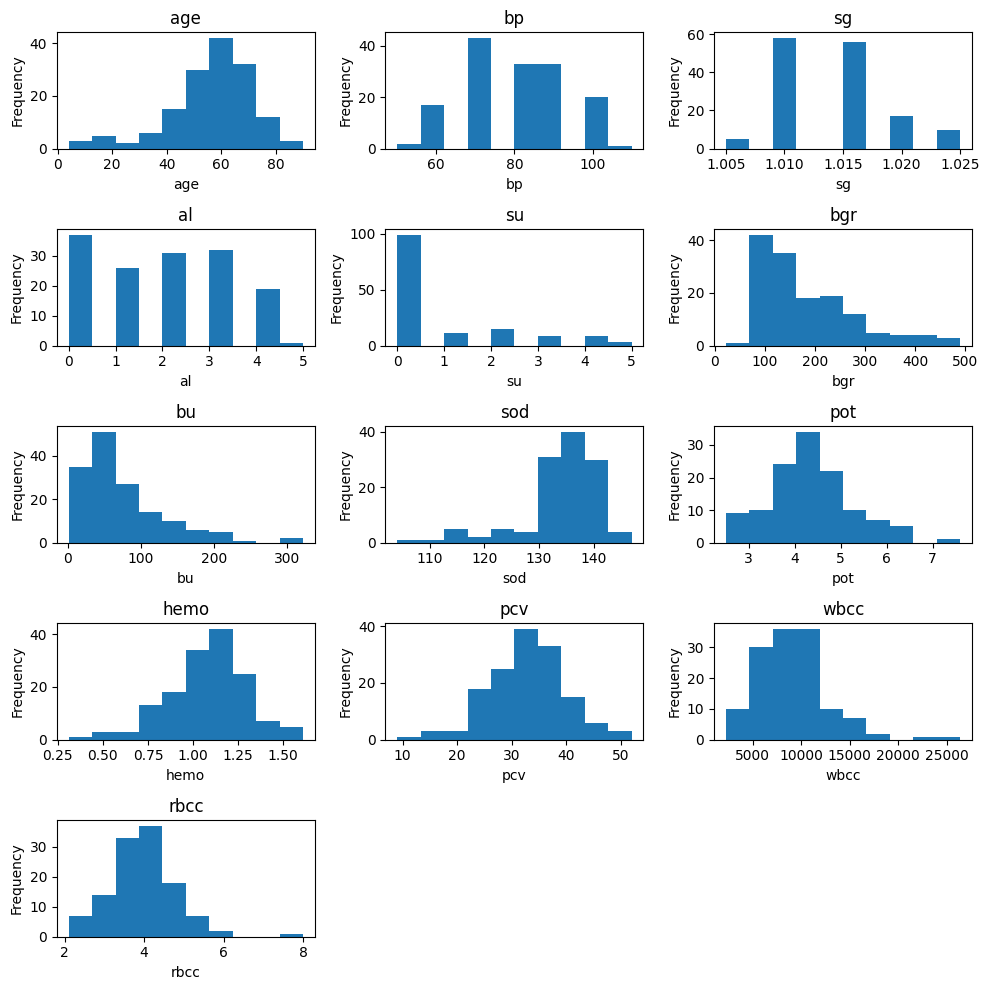

In [14]:
plot_data(df1)

renders the histogram for control inviduals

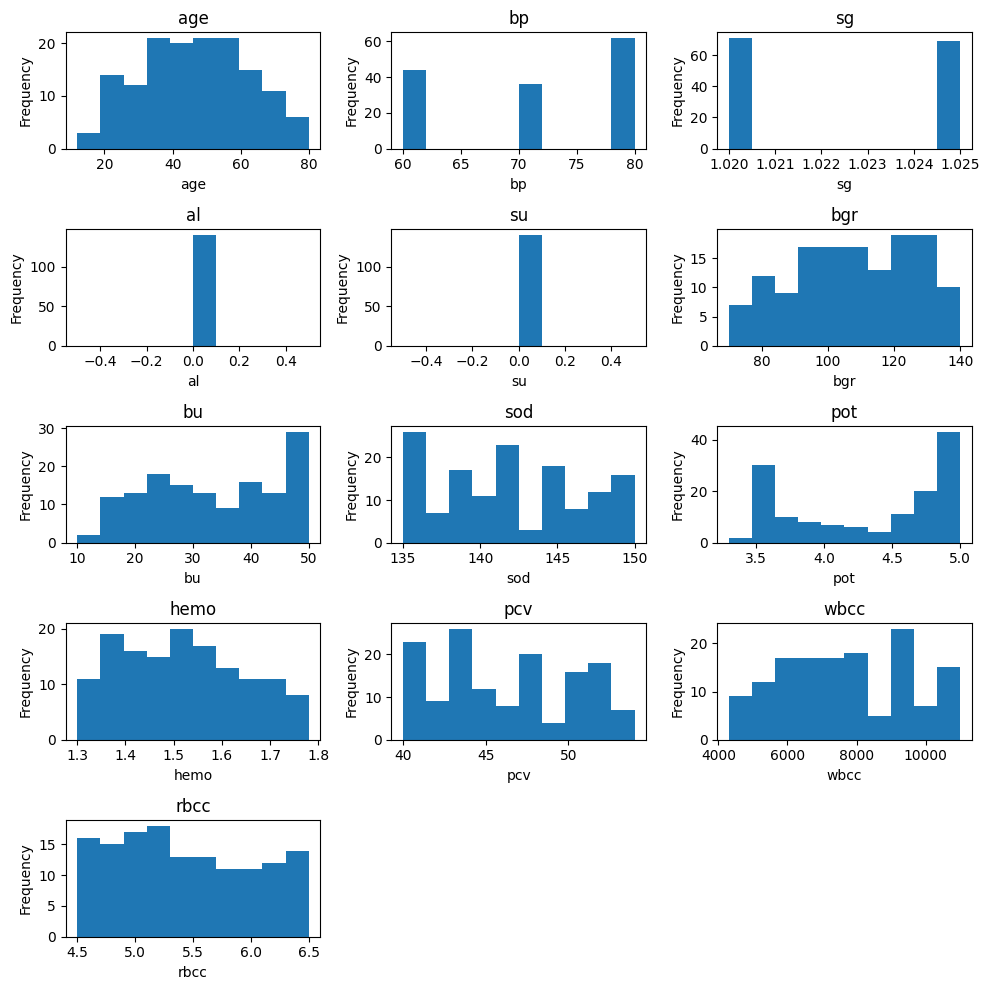

In [15]:
plot_data(df2)

calculates the correlation matrix for both dataframes.

In [16]:
corr1 = df1.corr(numeric_only=True)
corr2 = df2.corr(numeric_only=True)
corr2.fillna(0,inplace=True)

function for creating the heatmap.

In [17]:
def create_heatmap(corr):
    plt.figure(figsize=(10, 10))
    plt.imshow(corr, cmap='coolwarm', interpolation='none')
    plt.colorbar()
    plt.xticks(range(len(corr)), corr.columns, rotation=90)
    plt.yticks(range(len(corr)), corr.columns)
    plt.show()

 renders the heatmaps for dataframe 1(affected)

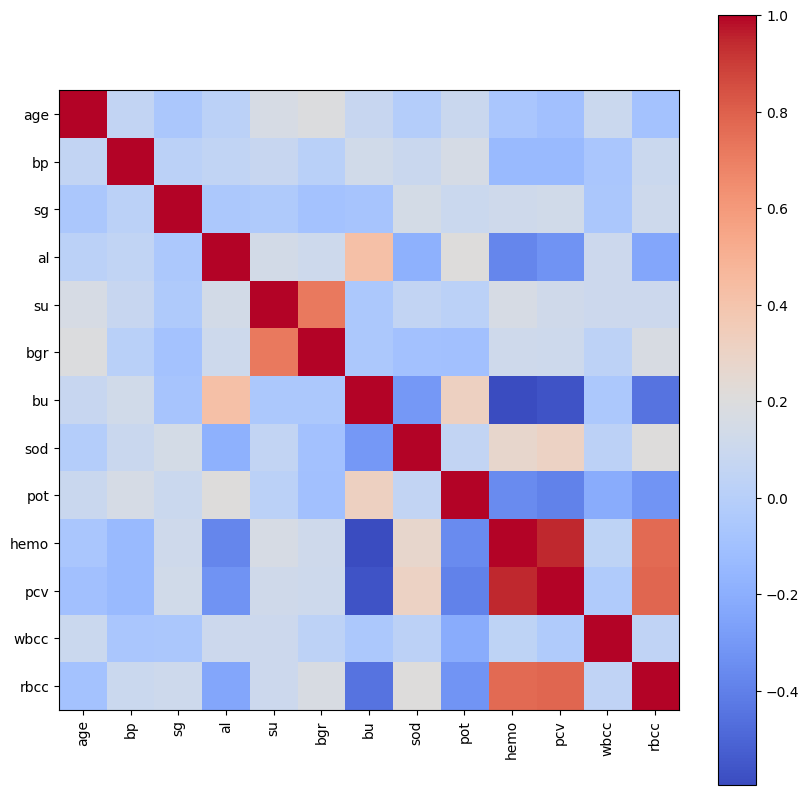

In [18]:
create_heatmap(corr1)

 renders the heatmap for dataframe 2(control)

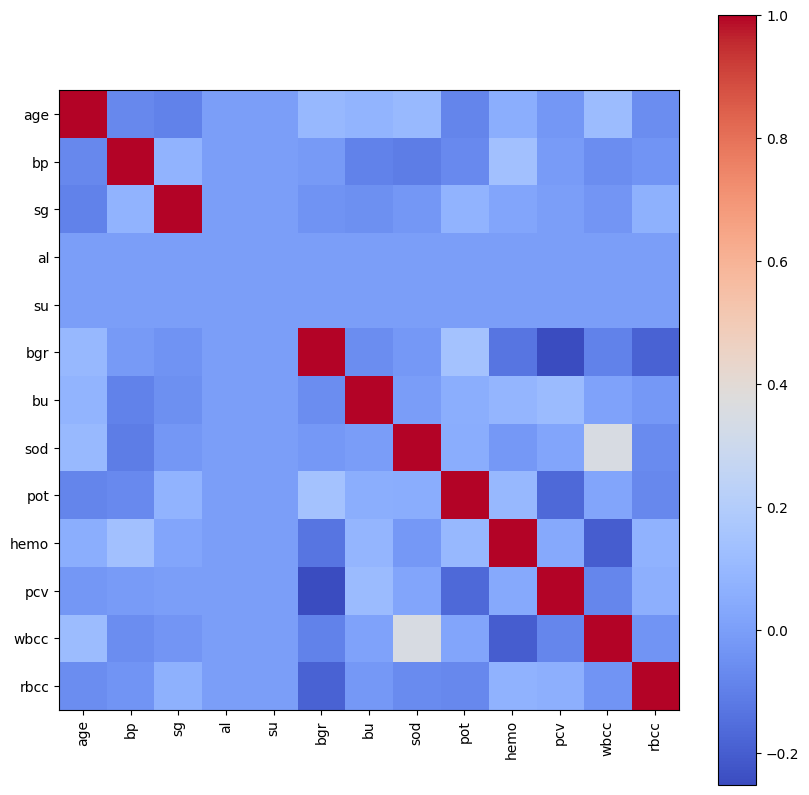

In [19]:
create_heatmap(corr2)

shows basic statistics from both dataframes and compares them together in an "easy" to read table

In [20]:
desc_df1 = df1.describe()
desc_df2 = df2.describe()
desc_df1.compare(desc_df2,result_names=('affected', 'control'),keep_equal=True)

age                      bp                      sg              \
         affected     control    affected     control    affected     control   
count  150.000000  144.000000  149.000000  142.000000  146.000000  140.000000   
mean    55.913333   46.597222   79.530201   71.267606    1.013938    1.022464   
std     15.625627   15.790729   13.014315    8.576659    0.004705    0.002509   
min      4.000000   12.000000   50.000000   60.000000    1.005000    1.020000   
25%     48.000000   34.000000   70.000000   60.000000    1.010000    1.020000   
50%     59.000000   46.000000   80.000000   70.000000    1.015000    1.020000   
75%     65.000000   58.000000   90.000000   80.000000    1.015000    1.025000   
max     90.000000   80.000000  110.000000   80.000000    1.025000    1.025000   

               al                  su                 bgr              \
         affected control    affected control    affected     control   
count  146.000000   140.0  146.000000   140.0  143.000000  140.000000   
mean     1.815068     0.0    0.815068     0.0  181.153846  107.571429   
std      1.404443     0.0    1.374664     0.0   95.343065   18.586041   
min      0.000000     0.0    0.000000     0.0   22.000000   70.000000   
25%      0.250000     0.0    0.000000     0.0  107.000000   93.000000   
50%      2.000000     0.0    0.000000     0.0  150.000000  107.500000   
75%      3.000000     0.0    1.000000     0.0  240.000000  123.250000   
max      5.000000     0.0    5.000000     0.0  490.000000  140.000000   

               bu                     sod                     pot              \
         affected     control    affected     control    affected     control   
count  151.000000  140.000000  123.000000  141.000000  122.000000  141.000000   
mean    75.623179   32.921429  134.089431  141.744681    4.390984    4.330496   
std     57.616119   11.330908    7.451491    4.797923    0.887843    0.590634   
min      1.500000   10.000000  104.000000  135.000000    2.500000    3.300000   
25%     36.000000   24.000000  132.000000  138.000000    3.900000    3.700000   
50%     55.000000   33.000000  136.000000  141.000000    4.250000    4.500000   
75%     97.000000   44.000000  139.000000  146.000000    4.900000    4.900000   
max    322.000000   50.000000  147.000000  150.000000    7.600000    5.000000   

             hemo                     pcv                      wbcc  \
         affected     control    affected     control      affected   
count  151.000000  141.000000  146.000000  143.000000    133.000000   
mean     1.066424    1.518156   32.767123   46.300699   9076.691729   
std      0.216947    0.127826    7.095449    4.128286   3644.441330   
min      0.310000    1.300000    9.000000   40.000000   2200.000000   
25%      0.955000    1.410000   29.000000   43.000000   6900.000000   
50%      1.090000    1.500000   33.000000   46.000000   9000.000000   
75%      1.200000    1.610000   37.000000   50.000000  10500.000000   
max      1.610000    1.780000   52.000000   54.000000  26400.000000   

                           rbcc              
            control    affected     control  
count    140.000000  119.000000  140.000000  
mean    7677.142857    3.958824    5.387143  
std     1839.429958    0.854144    0.594682  
min     4300.000000    2.100000    4.500000  
25%     6300.000000    3.400000    4.900000  
50%     7450.000000    3.900000    5.300000  
75%     9225.000000    4.400000    5.900000  
max    11000.000000    8.000000    6.500000

## Findings
### Affected
- Positive correlation between blood glucose random and sugar levels  
- Positive correlation between packed cell volume and hemo  
- Negative correlation between blood urea and hemoglobin 
### Control
- Negative correlation between packed cell volume and blood glucose random
- Negative correlation between white blood cell count and hemo
### Conclusion
- Easiest way to identify kidney diseases is via albumin and sugar values based on the fact that those are nonexistent on healthy inviduals.